In [6]:
import pandas as pd
erasmus = pd.read_csv("C:/Users/user/Desktop/Datasets/archive/erasmus.csv")
erasmus.head(10)

,INDEX,COUNTRIES,UNIVERSITIES,FACULTIES,DEPARTMENTS,EXAM SCORE,GRANT
0,1,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,98.50,1
1,2,ITALIA,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,FACULTY OF ARTS AND SCIENCES,SOCIOLOGY,97.10,1
2,3,GERMAN,UNIVERSITAET BIELEFELD,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,96.80,1
3,4,GERMAN,HOCHSCHULE FUR ANGEWANDTE WISSENSCHAFTEN HAMBURG,FACULTY OF HEALTH SCIENCES,NUTRITION AND DIETETICS,96.50,1
4,5,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,96.32,1
5,6,FRANCE,INSTITUT D'ETUDES POLITIQUES D'AIX-EN-PROVENCE,FACULTY OF ECONOMICS AND ADMINISTRATIVE SCIENCES,POLITICAL SCIENCE AND INTERNATIONAL RELATIONS,96.15,1
6,7,FINLAND,OULUN YLIOPISTO,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,95.80,1
7,8,GREECE,ETHNIKO KAI KAPODISTRIAKO PANEPISTIMIO ATHINON,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,95.52,1
8,9,SPAIN,UNIVERSIDAD AUTONOMA DE BARCELONA,FACULTY OF ARTS AND SCIENCES,TRANSLATION AND INTERPRETING STUDIES,95.13,1
9,10,IRELAND,UNIVERSITY OF LIMERICK,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,94.45,1


In [7]:
# GET INFORMATION ABOUT THE DATAFRAME
def get_df_info(df):
    print("\n\033[1mShape of DataFrame:\033[0m ", df.shape)
    print("\n\033[1mColumns in the DataFrame:\033[0m ", df.columns.to_list())
    print("\n\033[1mData types of columns:\033[0m ", df.dtypes)
    
    print("\n\033[1mInformation about the DataFrame:\033[0m ")
    df.info()
    
    print("\n\033[1mNumber of unique values in each column:\033[0m ")
    for col in df.columns:
        print(f"\033[1m{col}\033m[0m: {df[col].nunique()}")
    
    print("\n\033[1mNumber of null values in each column:\033[0m ", df.isnull().sum())
    
    print("\n\033[1mNumber of duplicated rows:\033[0m ", df.duplicated().sum())
    
    print("\n\033[1mDescriptive statistics of the DataFrame:\033[0m\n", )
    
    return df.describe().transpose()
    
# Call the function
get_df_info(erasmus)


Shape of DataFrame:  (341, 7)

Columns in the DataFrame:  ['INDEX', 'COUNTRIES', 'UNIVERSITIES', 'FACULTIES', 'DEPARTMENTS', 'EXAM SCORE', 'GRANT']

Data types of columns:  INDEX             int64
COUNTRIES        object
UNIVERSITIES     object
FACULTIES        object
DEPARTMENTS      object
EXAM SCORE      float64
GRANT             int64
dtype: object

Information about the DataFrame: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   INDEX         341 non-null    int64  
 1   COUNTRIES     341 non-null    object 
 2   UNIVERSITIES  341 non-null    object 
 3   FACULTIES     341 non-null    object 
 4   DEPARTMENTS   339 non-null    object 
 5   EXAM SCORE    341 non-null    float64
 6   GRANT         341 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 18.8+ KB

Number of unique values in each column: 
INDEXm: 341


,count,mean,std,min,25%,50%,75%,max
INDEX,341.0,171.000000,98.582453,1.0,86.00,171.0,256.00,341.0
EXAM SCORE,341.0,79.138944,8.565175,51.4,73.57,79.3,85.28,98.5
GRANT,341.0,0.434018,0.496356,0.0,0.00,0.0,1.00,1.0


DATA VISUALISATION

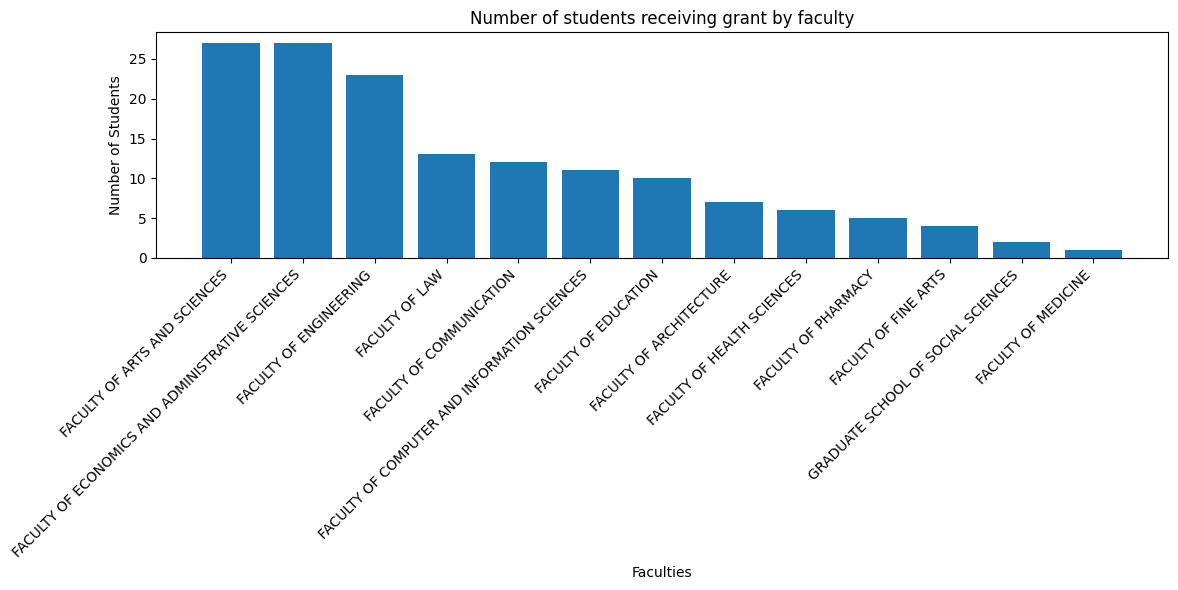

In [8]:
import matplotlib.pyplot as plt
#import seaborn as sns

#Filter data for ones whoo got the grant
df_grants = erasmus[erasmus['GRANT'] == 1]

#Number of students who received grant for each Faculty
std_fclty_count = df_grants['FACULTIES'].value_counts()

#bar plot
plt.figure(figsize=(12, 6))
plt.bar(std_fclty_count.index, std_fclty_count.values)
plt.title('Number of students receiving grant by faculty')
plt.xlabel('Faculties')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

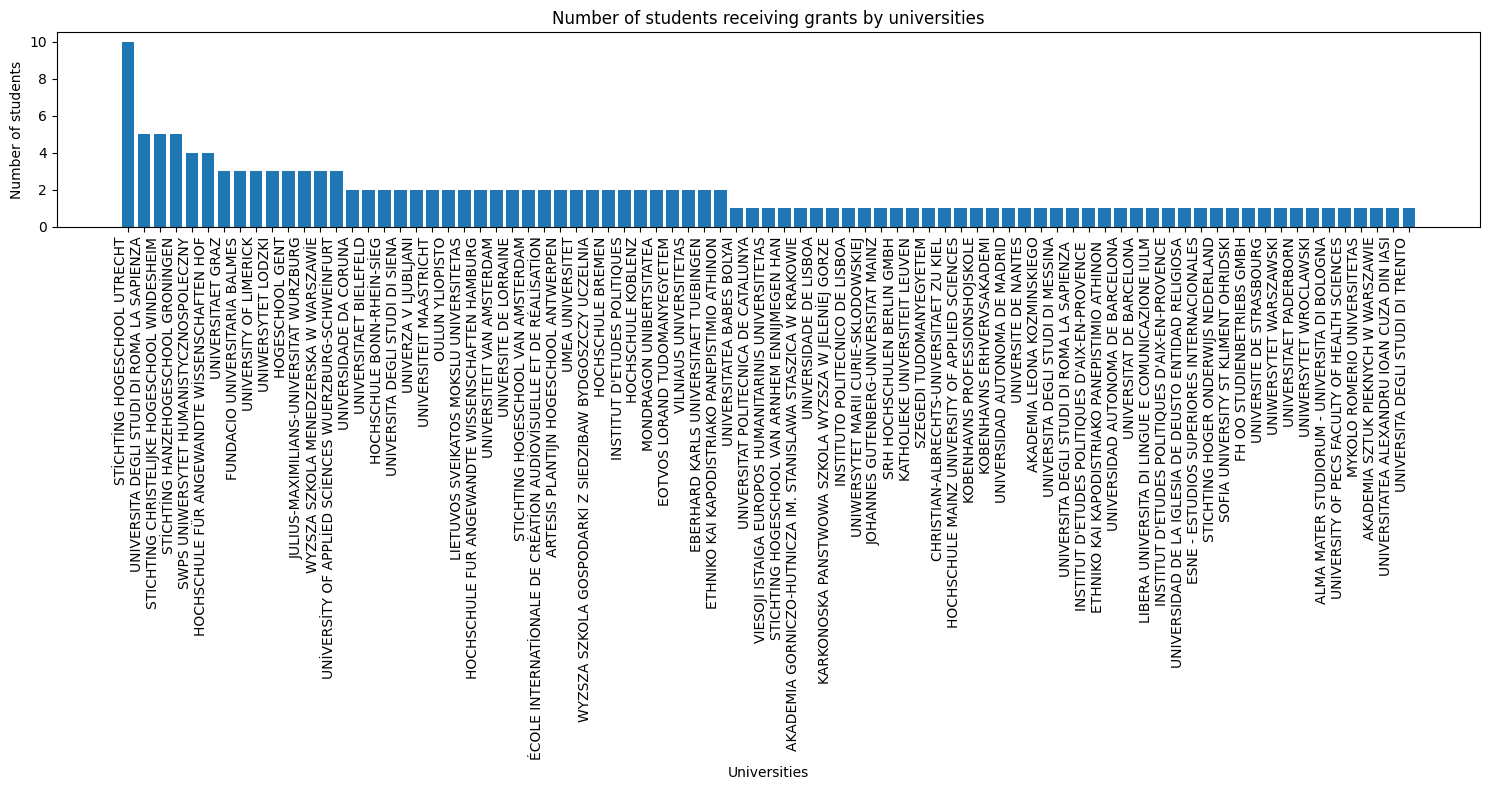

In [9]:
#Number of students who received grants from each university
std_uni_count = df_grants['UNIVERSITIES'].value_counts()

#bar plot
plt.figure(figsize=(15, 8))
plt.bar(std_uni_count.index, std_uni_count.values)
plt.title('Number of students receiving grants by universities')
plt.xlabel('Universities')
plt.ylabel('Number of students')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

plt.show()

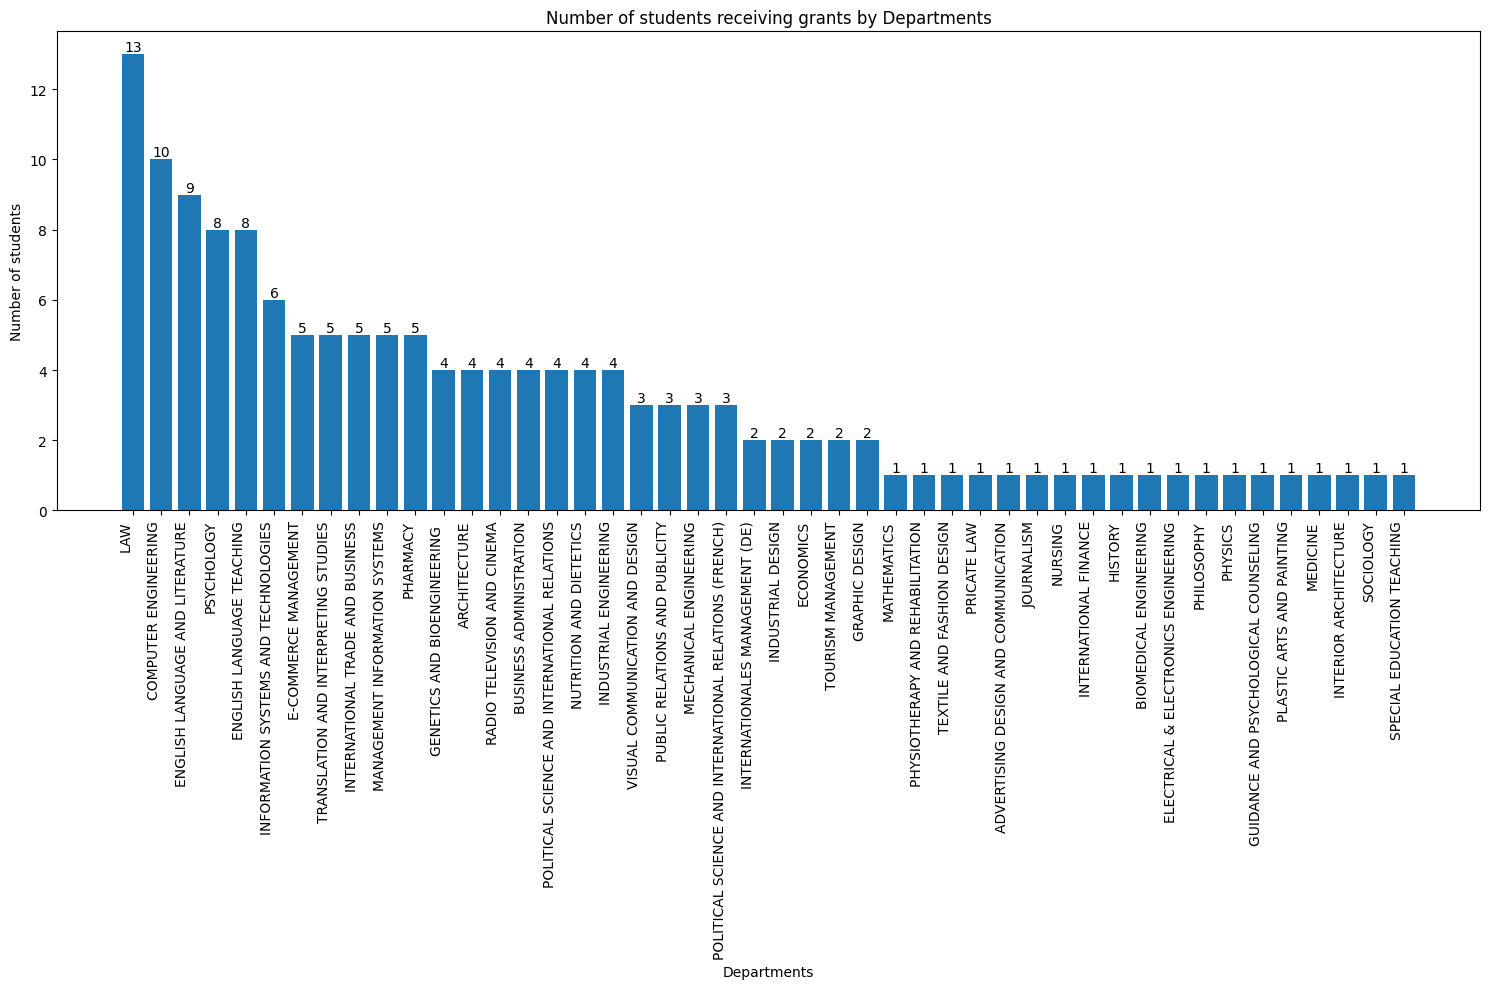

In [10]:
# Number of students who received a grant form each department
department_count =df_grants['DEPARTMENTS'].value_counts()

#bar_plot
plt.figure(figsize=(15,10))
plt.bar(department_count.index, department_count.values)
plt.title('Number of students receiving grants by Departments')
plt.xlabel('Departments')
plt.ylabel('Number of students')
plt.xticks(rotation=90, ha='right')

#add value on top of each bar
for i, v in enumerate(department_count):
    plt.text(i, v, str(v), ha='center', va='bottom')
    
plt.tight_layout()

plt.show()

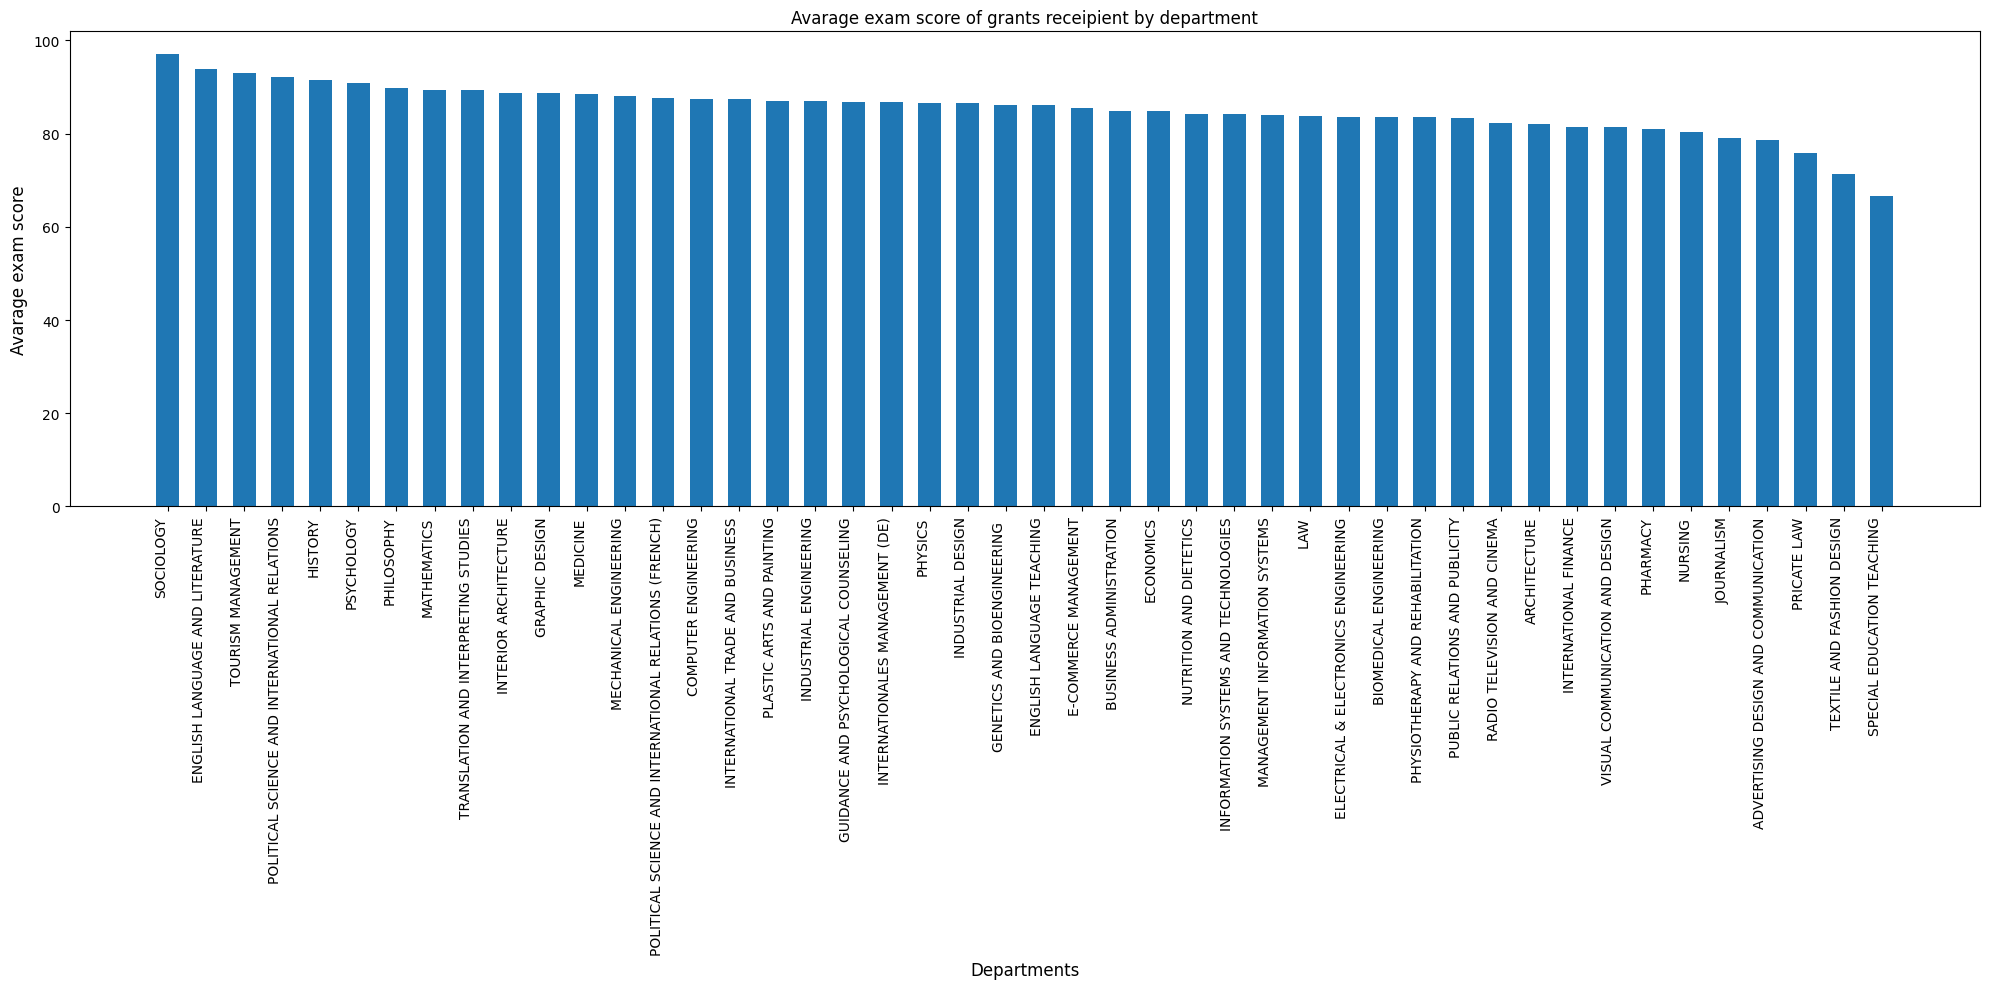

In [14]:
# the avarage exam score for each ddepartment
avg_score = df_grants.groupby('DEPARTMENTS')['EXAM SCORE'].mean().sort_values(ascending=False)

#bar_plot
plt.figure(figsize=(20, 10))
ax = plt.bar(avg_score.index, avg_score.values, width=0.6)
plt.title('Avarage exam score of grants receipient by department')
plt.xlabel('Departments', fontsize=12)
plt.ylabel('Avarage exam score', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=10)

#add value labels on each bar
#for i, v in enumerate(avg_score):
   # ax.text(i, v, str(v), ha='center', va='bottom', fontsize=9)
    
#adjust bottom margin
plt.subplots_adjust(bottom=0.2)

#set y axis to start from 0
#ax.set_ylim(0, max(avg_score) * 1.1)

plt.tight_layout()

plt.show()